In [2]:
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn-v0_8-talk')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import defaultdict

## Myself modules
from eGPS4Py.myutils import sets
from eGPS4Py.phylo import evoltree

In [8]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(type(s))

<class 'pandas.core.series.Series'>


In [9]:
dates = pd.date_range("20130101", periods=6)
print(type(dates))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [10]:
list("ABCD")

['A', 'B', 'C', 'D']

In [14]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [19]:
print( type( df2.to_numpy() ) )

<class 'numpy.ndarray'>


In [20]:
df2.T

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [21]:
import pandas as pd

df = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [40, 50, 60]
}, index=['x', 'y', 'z'])

In [24]:
# 获取某列
df.loc[:, 'A']

# 获取某行
df.loc['x', :]

# 获取某个单元格的值
df.at['x', 'A']

# 修改某个单元格的值（安全）
df.at['y', 'B'] = 99

Copy-on-write 写之后复制
Pandas 的 DataFrame 是一个 copy-on-write 的数据结构，即修改 DataFrame 的数据不会改变原始数据。

In [26]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
subset = df["foo"]
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [27]:
subset.iloc[0] = 100
subset

0    100
1      2
2      3
Name: foo, dtype: int64

In [28]:
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [29]:
np.random.randn(10, 4)

array([[-1.48518829, -0.21080848,  0.56577914, -0.27633322],
       [ 0.74311956, -0.14886951, -0.03838124, -1.18751366],
       [ 0.87910808, -0.12966743, -0.26089152,  0.91544301],
       [ 0.47402318, -1.52288899, -1.53219841, -0.46003046],
       [-0.417735  , -0.70564859,  1.1760403 ,  1.10387834],
       [ 2.77593388, -0.09739774,  0.42251254, -0.69195045],
       [ 0.87334249, -1.41581145,  0.37979336, -1.27055799],
       [-1.3971586 , -1.26381189,  0.32261832, -1.8080066 ],
       [ 0.18966731, -0.00455938, -0.36085894, -0.69857483],
       [-0.685186  , -0.41896913,  0.48428545, -1.14199091]])

<Figure size 1040x715 with 0 Axes>

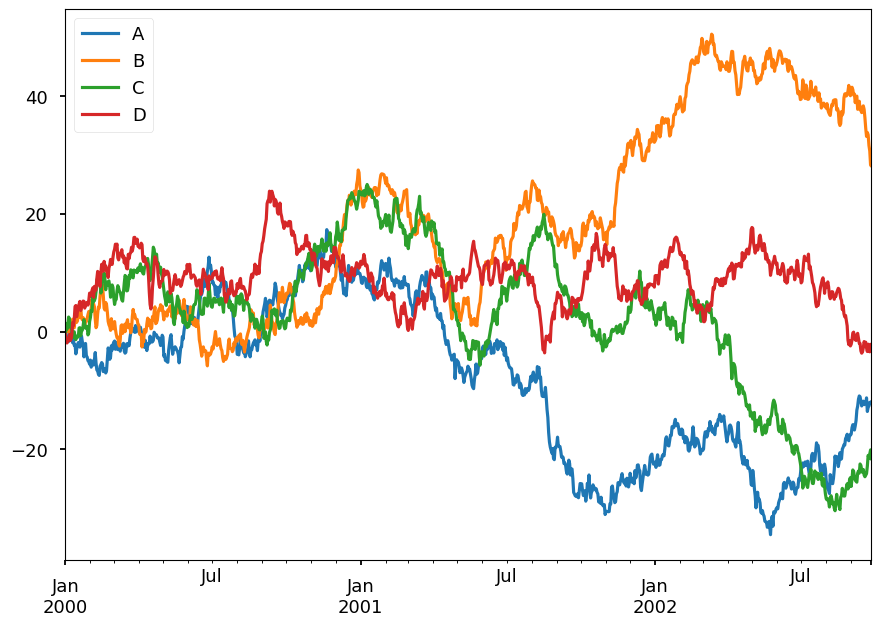

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义 ts（一个时间序列）
ts = pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()
# 用 ts 的索引来构造 DataFrame
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=["A", "B", "C", "D"]
)
# 累加（模拟趋势性数据）
df = df.cumsum()
# 绘图
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()


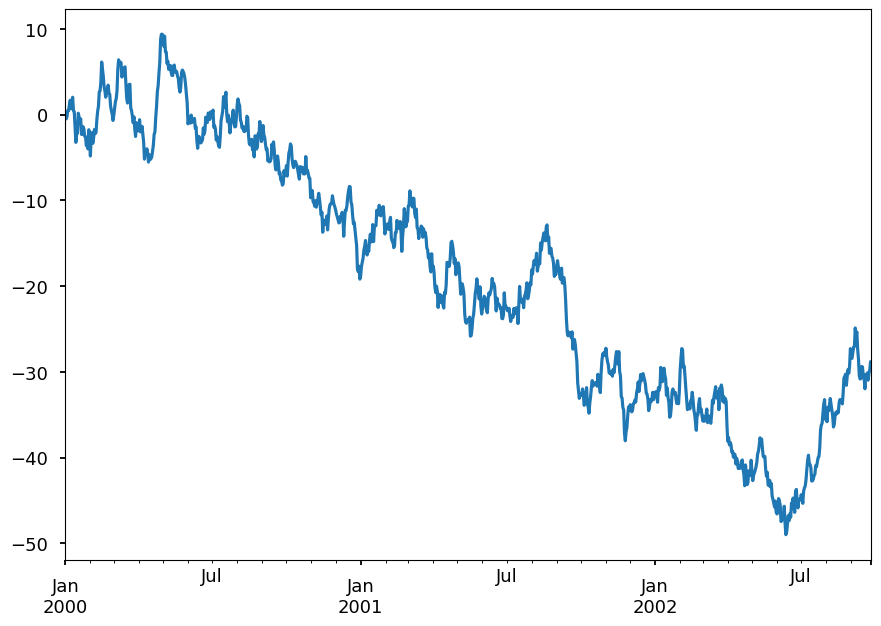

In [34]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [36]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}
df = pd.DataFrame(data)
df.head()

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04


In [37]:
pivoted = df.pivot(index="date", columns="variable", values="value")
pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11
